# Word cloud with bibdk searches

## Importing and working with data 

In [1]:
# Import the required libraries
import pandas as pd 
import json 

In [2]:
# Parse the json into a list while removing the '\n' character
data = []
with open('bibdk-soegetermer.json') as f:
    for line in f:
        data.append(json.loads(line.rstrip()))

In [3]:
# Import data into a pandas dataframe
pandasData = pd.DataFrame(data)

In [4]:
# Attribute names of the dataset
attributeNames = list(pandasData)
print(attributeNames)

['search', 'session_id', 'time', 'user_id', 'useragent']


## Data format 

In [5]:
pandasData

,search,session_id,time,user_id,useragent
0,to ryk og en aflevering,1,1420095600,0,
1,alkalinekuren,2,1420097572,0,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.3...
2,alkalinekuren,4,1420097584,3,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.3...
3,lars bill lundholm,5,1420097722,0,Feedly/1.0 (+http://www.feedly.com/fetcher.htm...
4,rutherfurd,6,1420098631,0,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1_2 like ...
5,jack reacher,7,1420100236,0,Drupal (+http://drupal.org/)
6,england,8,1420102310,0,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
7,england,9,1420102372,0,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
8,england,10,1420102433,0,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
9,england,11,1420102456,0,


## Searches for a single session user

In [6]:
# Find all searches by a user in a single session
sessionData = pandasData[pandasData['session_id'].duplicated()]

In [7]:
import numpy as np
import regex as re

In [8]:
# 1. Uniquify the repeated sessions and use them to find the search query in those sessions
# 2. Add the results from step (1) to make a word list
uniqueSessions = list(sessionData['session_id'].unique())
total_wordlist = []
for sessionId in uniqueSessions:
    miniSessionData = sessionData.loc[sessionData['session_id'] == sessionId, "search"]
    miniSessionDataList = list(miniSessionData)
    msDict = set(miniSessionDataList)
    for word in msDict:
        total_wordlist.append(word.split())

# Find all words that are entered in a search term -- Split sentences into single words
total_wordlist_flattened = [indword for subword in total_wordlist for indword in subword]

In [9]:
# Remove all symbols -- Retaining alphanumeric text
total_wordlist_refined = []
for singleWord in sorted(total_wordlist_flattened):
    newstring = re.sub(r'[^\w]', '', singleWord)
    # Add word to list if not empty -- else continue
    if newstring == '':
        continue
    else:
        total_wordlist_refined.append(newstring)

## Using stop words to remove commmon Danish words -- using nltk

In [10]:
import nltk
from nltk.corpus import stopwords 

# Uncomment the line below -- Downloads the stopwords text needed. 
# nltk.download()

# Filter all words using Danish stopwords
filtered_words = [word for word in total_wordlist_refined if word not in stopwords.words('danish')]

### Stemming the text word for word cloud -- using Danish language stemmer PyStemmer

In [11]:
# Since there were a few German words in data and also searches in English,
# it would be more accurate by stemming for Danish, English and German words.

import Stemmer
# First stem words in Danish 
Danishstemmer = Stemmer.Stemmer('danish')
stemmedDanishWords = Danishstemmer.stemWords(filtered_words)

# Second stem words in English 
Englishstemmer = Stemmer.Stemmer('english')
stemmedEnglishWords = Englishstemmer.stemWords(stemmedDanishWords)

# Thrird stem words in German 
Germanstemmer = Stemmer.Stemmer('german')
stemmedGermanWords = Germanstemmer.stemWords(stemmedEnglishWords)

# Remove all numbers from the list of words
noIntegerStrings = [x for x in stemmedGermanWords if not any(c.isdigit() for c in x)]

### Word cloud for stemmed words

In [12]:
# String containing all the words in the stemmed words list 
totalTextString = ''
for actualword in noIntegerStrings:
    totalTextString += actualword + ' '

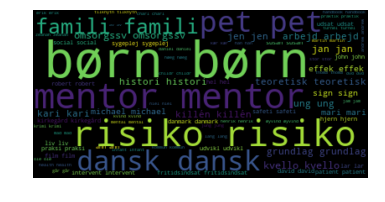

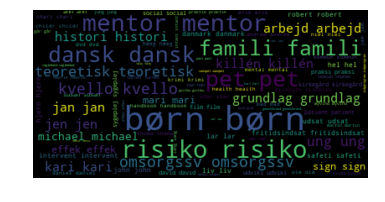

In [13]:
# Use wordcloud library to generate one -- using PythonImagingLibrary
from wordcloud import WordCloud

text = totalTextString

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('DanishBibdk.pdf', format='pdf')
plt.show()